In [1]:
import pandas as pd
from scipy.stats import norm

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib.ticker import MultipleLocator
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%config InlineBackend.figure_format = 'retina'
sns.set_style({'font.family':'sans-serif', 'font.sans-serif':'Arial'})

In [2]:
# read in shortest distances in BSNA
# has columns ['sample', 'avg_shortest_distance']
bsna = pd.read_csv('output/indv_perm_BSNA.tsv', sep='\t')
bsna.columns = ['sample', 'avg_shortest_distance']
bsna = bsna.set_index('sample', drop=False)

In [3]:
# read in shortest distances in permuted network
perm = pd.DataFrame()

for i in range(1, 101):
    # each file has columns ['sample', 'avg_shortest_distance']
    infile = 'output/indv_perm_{}.tsv'.format(i)
    app = pd.read_csv(infile, sep='\t')
    app.columns = ['sample', 'avg_shortest_distance']

    # add column to specify which permuted network
    app['perm_number'] = i
    
    # append to perm dataframe
    perm = perm.append(app)

        

In [4]:
# get list of subjects
subjects = bsna['sample'].to_list()

In [11]:
# for each subject get z-score of BSNA compared to permuted networks
for sub in subjects:
    
    # get true average shortest distance
    true_avg_shortest_distance = bsna.loc[sub, 'avg_shortest_distance']
    
    # filter for subject
    sub_perm = perm[perm['sample'] == sub]
    
    # get mean and standard deviation of permuted networks
    mean    = sub_perm.avg_shortest_distance.mean()
    std_dev = sub_perm.avg_shortest_distance.std()
    
    # get zscore and pvalue from a one sided normal distribution
    zscore = (true_avg_shortest_distance - mean) / std_dev
    pvalue = norm.sf(abs(zscore))
    
    bsna.at[sub, 'mean_of_permuted'] = mean
    bsna.at[sub, 'std_dev'] = std_dev
    bsna.at[sub, 'z_score'] = zscore
    bsna.at[sub, 'p_value'] = pvalue


In [13]:
bsna.to_csv('indiv_perm.tsv', sep='\t', index=False)

FC_01


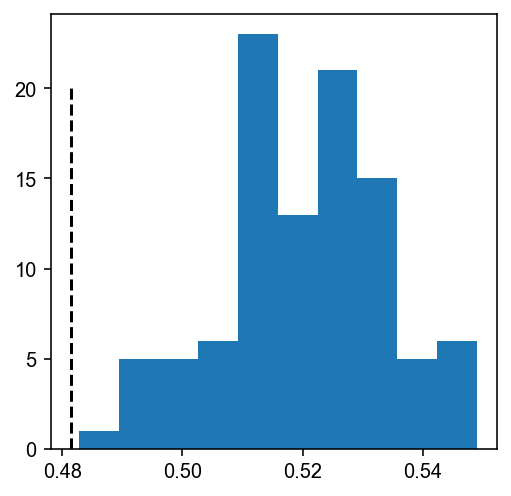

M1C_07


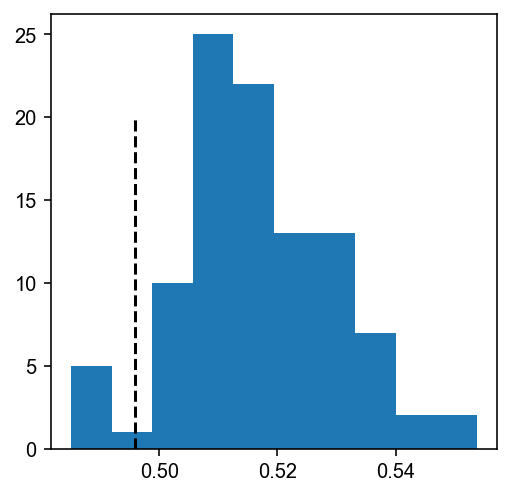

M2C_07


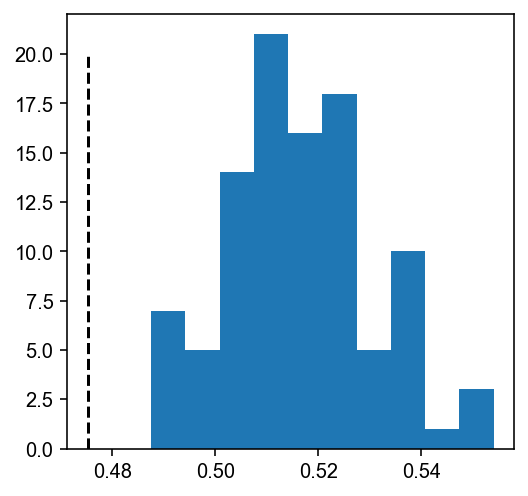

MC_05


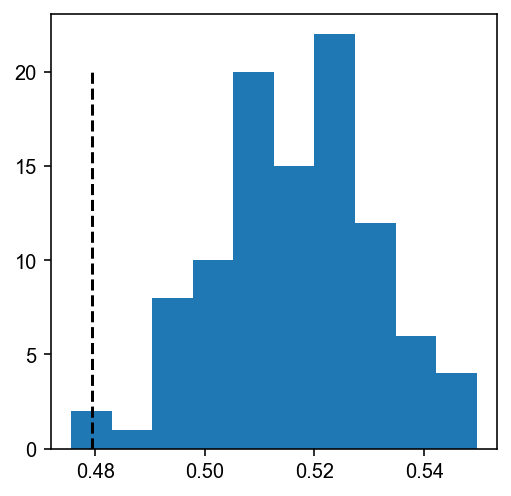

P1C_01


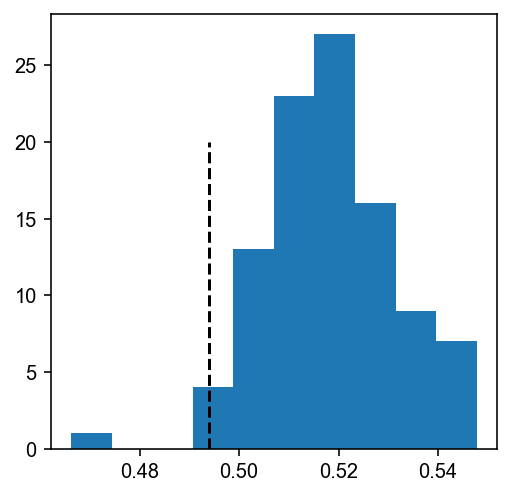

P1C_04


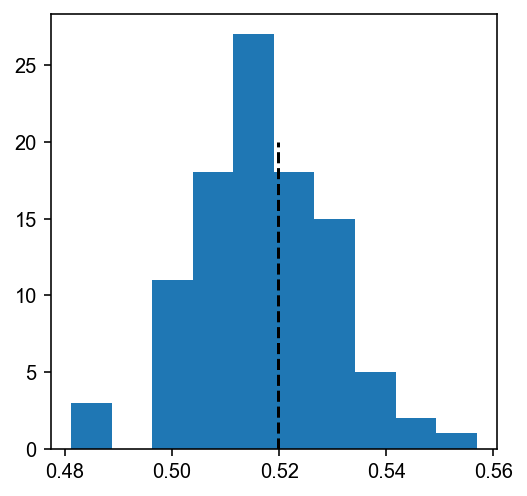

P1C_05


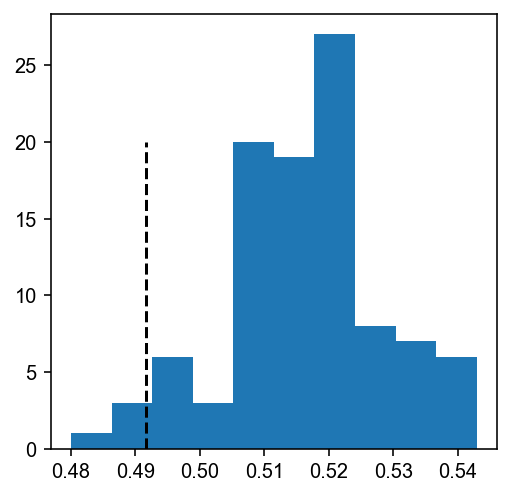

P1C_07


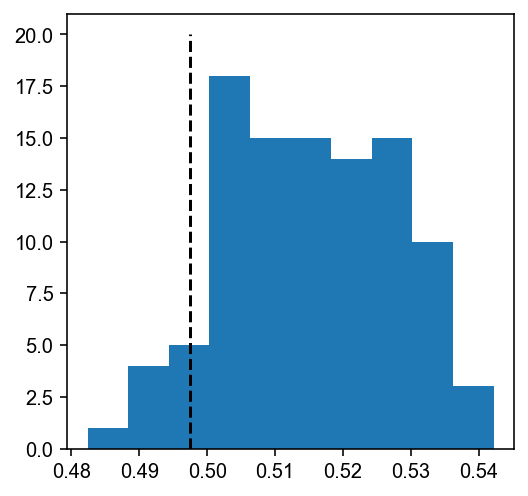

P2C_04


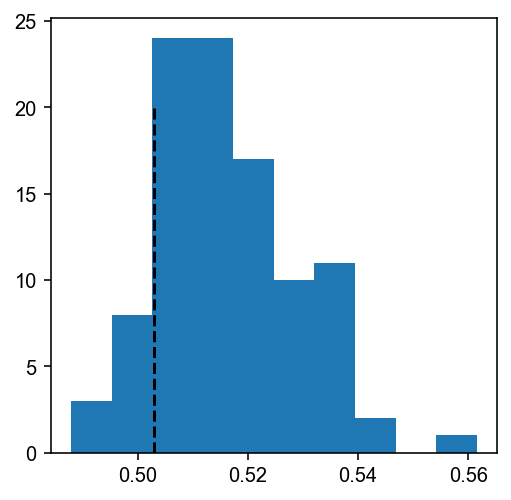

P2C_05


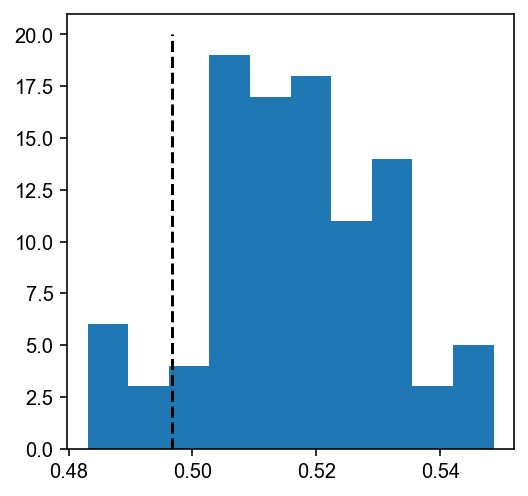

P2C_07


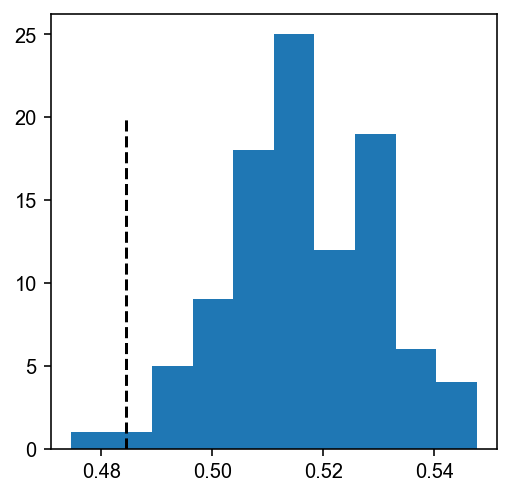

P2C_52


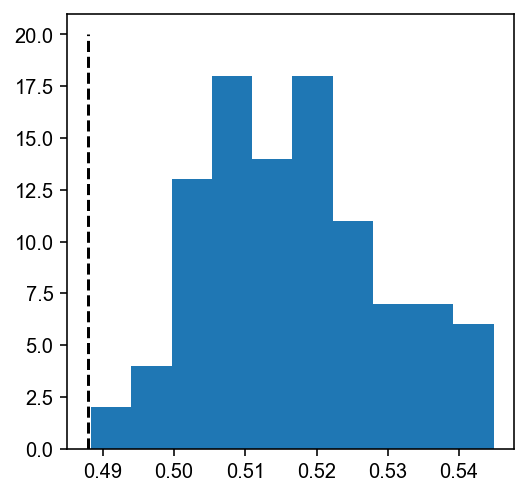

P3C_07


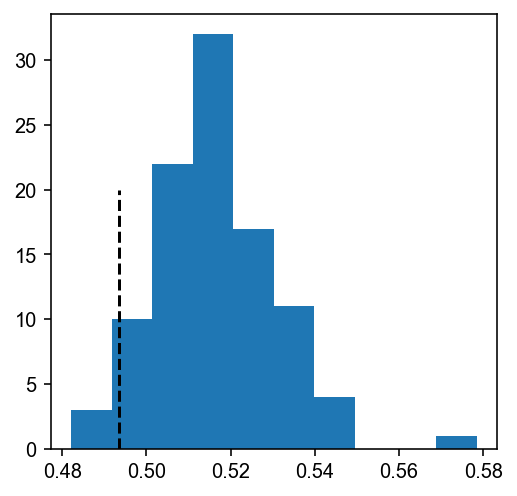

S2NC_52


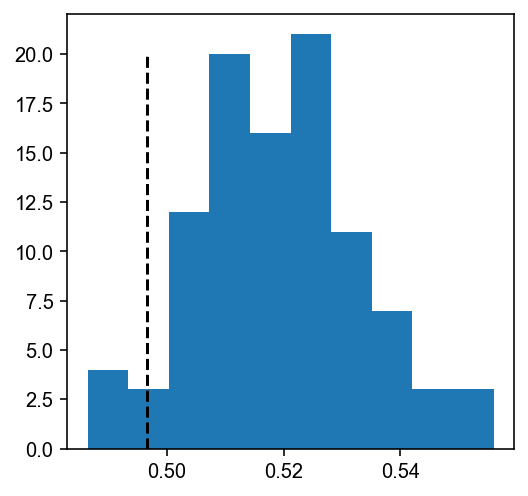

S3NC_52


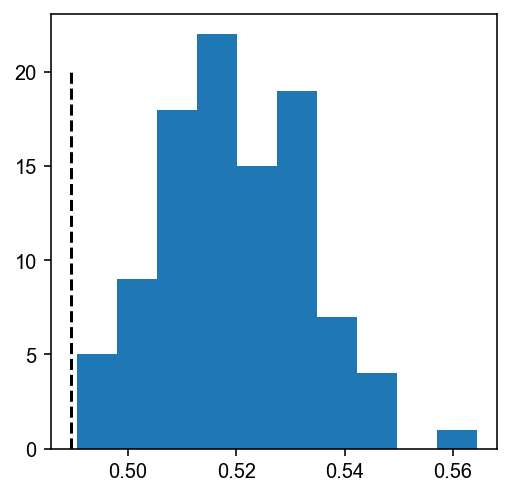

SNC_04


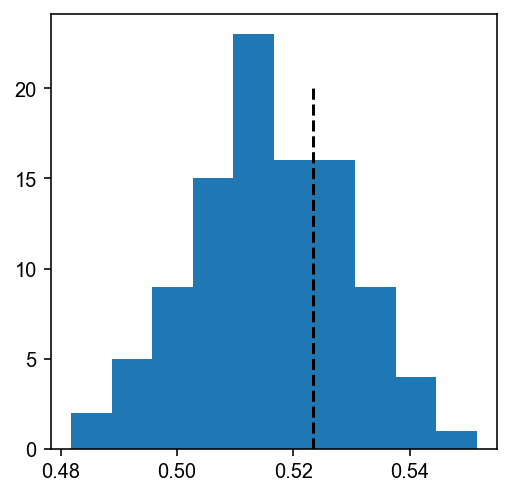

SNC_07


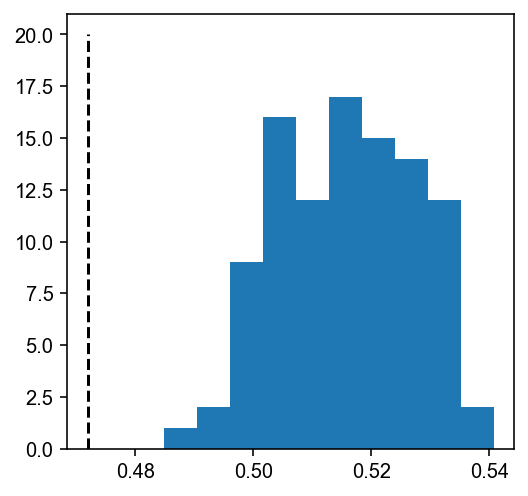

In [6]:
# plot
for sub in subjects:
    # filter for subject
    sub_perm = perm[perm['sample'] == sub]
    
    # get true average shortest distance
    true_avg_shortest_distance = bsna.loc[sub, 'avg_shortest_distance']
    
    # make histogram
    print(sub)
    plt.figure(figsize=(4,4))
    plt.hist(sub_perm.avg_shortest_distance)
    
    yline = [0,20]
    xline = [true_avg_shortest_distance,true_avg_shortest_distance]
    plt.plot(xline, yline, color='black', ls='--')
    plt.show()